# Reproducing Hakim CDA Study (2020) - G vs B

### Notes

In [1]:
import numpy as np
import pandas as pd
import glob
import pickle
import copy

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_brainvision

from scipy.io import loadmat

import os
import sys
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Hakim-2020/')
from events import get_specific_events, get_epochs, get_CDA, prep_report, fill_report, get_report, checksum

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prep Data

In [2]:
#==================================================================
# General Variables
#==================================================================
triggers = dict();

triggers['int'] = [21, 22] 
triggers['no_int'] = [11, 12]

triggers['left'] = [12, 22]  #[11, 21]
triggers['right'] = [11, 21] #[12, 22]

triggers['good'] = [91]
triggers['bad'] = [90]

# Labels
conds = ['int', 'no_int']
sides = ['left', 'right']
perfs = ['good', 'bad']

# CDA Channels
chan_right = ['PO8']
chan_left = ['PO7']

# Epoc Information
epoch_length = 3.65
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA main variable & Reports
cda_dict = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
directory_path = '/Volumes/Nick - Data/CDA Datasets/Hakim 2020/Experiment 1/EegData/'

eegfiles = [os.path.join(dirpath, f)
    for dirpath, dirnames, files in os.walk(directory_path)
    for f in files if f.endswith('.vhdr')]

for filepath in eegfiles:
    filename = filepath[filepath.rfind('/')+1:]
    print('Processing: ' + filename + '...')

    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_brainvision(filepath, preload=True)
    
    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Resample
    preproc = raw.resample(500)

    # Filter
    preproc = preproc.filter(.1, 30., fir_design='firwin')

    # Get events
    events = mne.events_from_annotations(preproc)
    events = events[0]
    
    #preproc.plot(events=events[0], block=True, lowpass=40)

    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    specific_events = get_specific_events(events, conds, sides, perfs, triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr)

    # ------------------------
    # 4. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    # ------------------------
    # 5. -- CDA --
    # ------------------------
    cda_dict[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)

# Add time points to CDA for later use.
times = epochs_dict['int']['left']['good'].times

print('{} Subjects & {} Trials'.format(len(report), np.sum([report[cond].sum() for cond in conds])))
report

Processing: Int1_2017.vhdr...
Extracting parameters from /Volumes/Nick - Data/CDA Datasets/Hakim 2020/Experiment 1/EegData/1/Int1_2017.vhdr...
Setting channel info structure...
Reading 0 ... 3477439  =      0.000 ...  6954.878 secs...


/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist limit) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['HEOG', 'VEOG', 'StimTrak']
Consider setting the channel types to be of EEG/s

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: No coordinate information found for channels ['HEOG', 'VEOG', 'StimTrak']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = read_raw_brainvision(filepath, preload=True)
/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_7539/349586793.py:49: RuntimeWarning: Channels contain different lowpass filters. Highest (weakest) filter setting (250.00 Hz, Nyquist l

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 sec)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 90', 'Stimulus/S 91', 'Stimulus/S100', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103', 'Stimulus/S104', 'Stimulus/S105', 'Stimulus/S106']
====================== EPOCHING ======================
tmin:-0.2, tmax:3.65, baseline=(-0.2, 0)
---------- int-left-good -------------
Not setting metadata
Not sett

,int,no_int,left,right,good,bad,int-left,int-left-good,int-good,int-left-bad,...,no_int-left,no_int-left-good,no_int-good,no_int-left-bad,no_int-bad,no_int-right,no_int-right-good,no_int-right-bad,checksum,notes
Int1_2017.vhdr,300,900,600,600,802,398,150,95,195,55,...,450,319,607,131,293,450,288,162,1,
10_Int1_2017.vhdr,300,900,600,600,682,518,150,82,163,68,...,450,261,519,189,381,450,258,192,1,
11_Int1_2017.vhdr,300,900,600,600,789,411,150,84,179,66,...,450,305,610,145,290,450,305,145,1,
12_Int1_2017.vhdr,300,900,600,600,804,396,150,94,188,56,...,450,304,616,146,284,450,312,138,1,
13_Int1_2017.vhdr,300,900,600,600,685,515,150,87,168,63,...,450,262,517,188,383,450,255,195,1,
14_Int1_2017.vhdr,300,900,600,600,752,448,150,84,164,66,...,450,299,588,151,312,450,289,161,1,
15_Int1_2017.vhdr,300,900,600,600,833,367,150,101,203,49,...,450,309,630,141,270,450,321,129,1,
16_Int1_2017.vhdr,300,900,600,600,732,468,150,89,185,61,...,450,287,547,163,353,450,260,190,1,
17_Int1_2017.vhdr,300,900,600,600,764,436,150,106,196,44,...,450,288,568,162,332,450,280,170,1,
18_Int1_2017.vhdr,300,900,600,600,797,403,150,86,180,64,...,450,310,617,140,283,450,307,143,1,


## 4. Plot CDA Data - Grand CDA Average

In [3]:
cda_all = dict()

for cond in cda_dict[list(cda_dict.keys())[0]].keys():
    cda_all[cond] = dict()

    perf = 'good'
    for f in cda_dict.keys():
        ldict = cda_dict[f][cond]['left']
        rdict = cda_dict[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = (cda_dict[f][cond]['left']['good'] + cda_dict[f][cond]['right']['good'])/2
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

## Final CDA figure from Hakim 2020

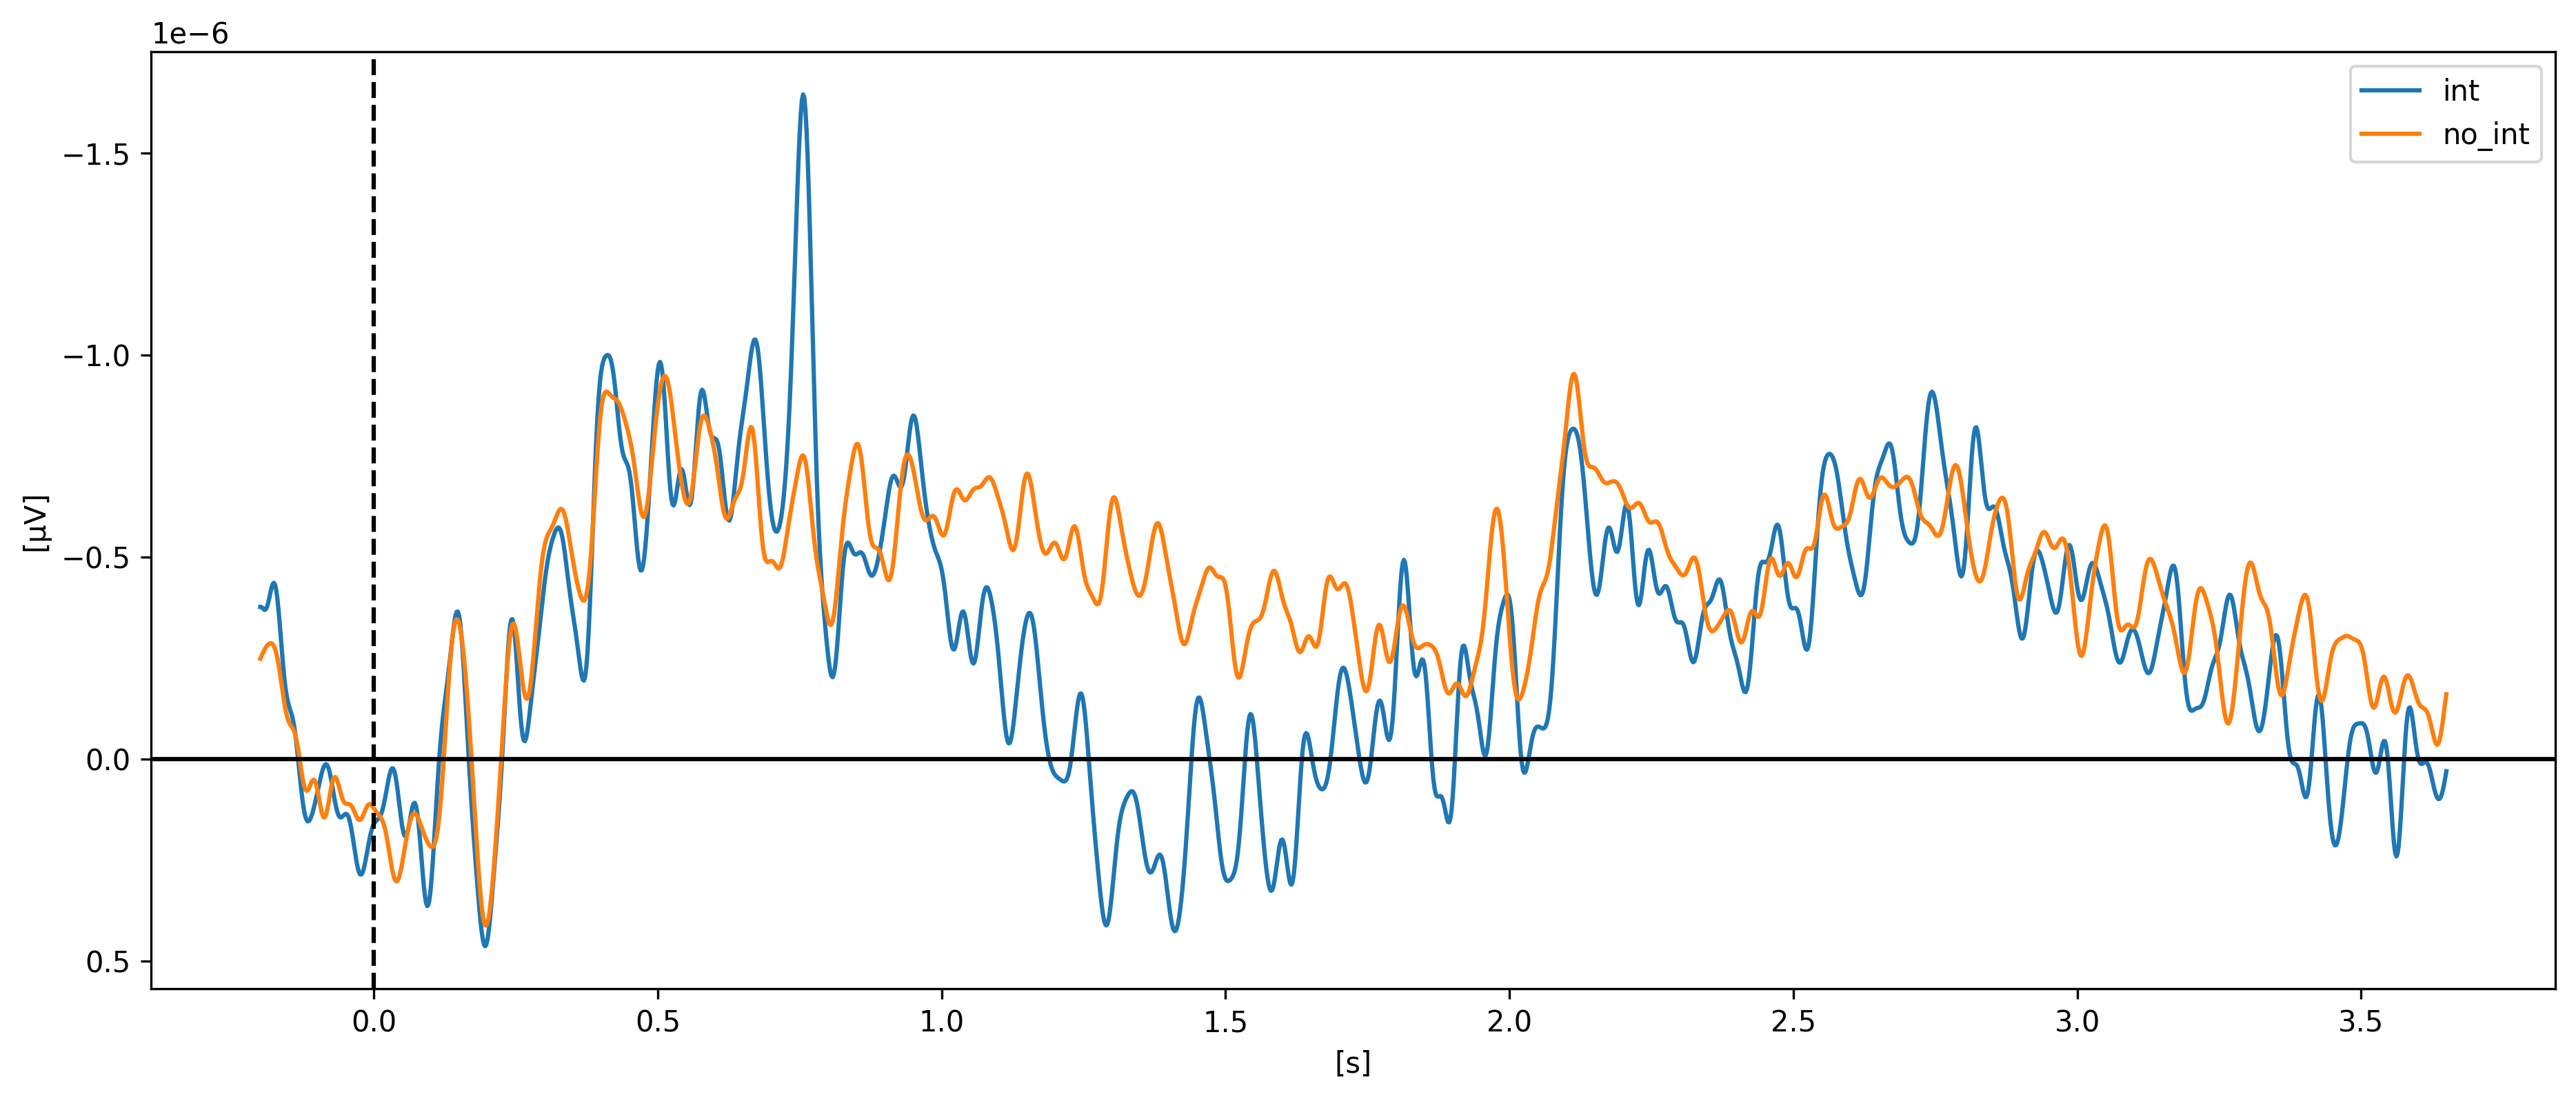

In [4]:
plt.figure(figsize=(15, 6), dpi=300)
plt.plot(times, cda_all['int'].mean(0), label='int')
plt.plot(times, cda_all['no_int'].mean(0), label='no_int')

plt.axvline(x=0, color='k', linestyle='--')
plt.axvline(x=1.65, color='k', linestyle='--')
plt.axhline(y=0, color='k', linestyle='-')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')
plt.show()
#plt.savefig("./img/Gunseli-2019_CDA-reprod.jpg", dpi=300)